In [1]:
#Library 
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

In [2]:
df = pd.read_csv("https://github.com/faridaarum/study-case/blob/bca6dac01392ea4ec10531432ebe2ee78993afc3/study_case.csv?raw=true")
print(df.head())

   user_id first_contact checkout_date  paid_date   channel      occupation  \
0      297      8/7/2022     8/17/2022  8/19/2022  referral          worker   
1      197     8/30/2022     9/13/2022  10/1/2022   organic     job_seekers   
2      259     8/27/2022     8/29/2022  9/10/2022   inbound     job_seekers   
3      207     8/28/2022     9/16/2022  9/24/2022   organic          worker   
4      155     8/31/2022      9/6/2022  9/13/2022  referral  fresh_graduate   

       city  age  
0   bandung   33  
1   jakarta   23  
2  semarang   29  
3  semarang   22  
4  semarang   22  


In [3]:
df.info()

#print total missing value 
mv = df.isna().sum()
print("\nJumlah missing value per kolom:\n", mv)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        100 non-null    int64 
 1   first_contact  100 non-null    object
 2   checkout_date  100 non-null    object
 3   paid_date      100 non-null    object
 4   channel        100 non-null    object
 5   occupation     100 non-null    object
 6   city           100 non-null    object
 7   age            100 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 6.4+ KB

Jumlah missing value per kolom:
 user_id          0
first_contact    0
checkout_date    0
paid_date        0
channel          0
occupation       0
city             0
age              0
dtype: int64


In [4]:
df

,user_id,first_contact,checkout_date,paid_date,channel,occupation,city,age
0,297,8/7/2022,8/17/2022,8/19/2022,referral,worker,bandung,33
1,197,8/30/2022,9/13/2022,10/1/2022,organic,job_seekers,jakarta,23
2,259,8/27/2022,8/29/2022,9/10/2022,inbound,job_seekers,semarang,29
3,207,8/28/2022,9/16/2022,9/24/2022,organic,worker,semarang,22
4,155,8/31/2022,9/6/2022,9/13/2022,referral,fresh_graduate,semarang,22
...,...,...,...,...,...,...,...,...
95,200,8/10/2022,8/27/2022,9/14/2022,inbound,job_seekers,surabaya,23
96,189,8/13/2022,8/19/2022,8/31/2022,organic,job_seekers,bandung,26
97,173,8/7/2022,8/21/2022,8/28/2022,organic,fresh_graduate,semarang,24
98,218,8/14/2022,8/23/2022,9/9/2022,digital_festival,worker,surabaya,34


In [5]:
df['first_contact_formatted'] = ''
for index, row in df.iterrows():
    date = datetime.strptime(row['first_contact'], "%m/%d/%Y")
    date_formatted = date.strftime("%Y-%m-%d")
    df.at[index, 'first_contact_formatted'] = date_formatted

print(df)



    user_id first_contact checkout_date  paid_date           channel  \
0       297      8/7/2022     8/17/2022  8/19/2022          referral   
1       197     8/30/2022     9/13/2022  10/1/2022           organic   
2       259     8/27/2022     8/29/2022  9/10/2022           inbound   
3       207     8/28/2022     9/16/2022  9/24/2022           organic   
4       155     8/31/2022      9/6/2022  9/13/2022          referral   
..      ...           ...           ...        ...               ...   
95      200     8/10/2022     8/27/2022  9/14/2022           inbound   
96      189     8/13/2022     8/19/2022  8/31/2022           organic   
97      173      8/7/2022     8/21/2022  8/28/2022           organic   
98      218     8/14/2022     8/23/2022   9/9/2022  digital_festival   
99      131     8/29/2022      9/2/2022  9/16/2022          referral   

        occupation      city  age first_contact_formatted  
0           worker   bandung   33              2022-08-07  
1      job_seek

In [14]:
df['checkout_date_formatted'] = ''
for index, row in df.iterrows():
    date = datetime.strptime(row['checkout_date'], "%m/%d/%Y")
    date_formatted = date.strftime("%Y-%m-%d")
    df.at[index, 'checkout_date_formatted'] = date_formatted

df['paid_date_formatted'] = ''
for index, row in df.iterrows():
    date = datetime.strptime(row['paid_date'], "%m/%d/%Y")
    date_formatted = date.strftime("%Y-%m-%d")
    df.at[index, 'paid_date_formatted'] = date_formatted
    
print(df)

    user_id first_contact checkout_date  paid_date           channel  \
0       297      8/7/2022     8/17/2022  8/19/2022          referral   
1       197     8/30/2022     9/13/2022  10/1/2022           organic   
2       259     8/27/2022     8/29/2022  9/10/2022           inbound   
3       207     8/28/2022     9/16/2022  9/24/2022           organic   
4       155     8/31/2022      9/6/2022  9/13/2022          referral   
..      ...           ...           ...        ...               ...   
95      200     8/10/2022     8/27/2022  9/14/2022           inbound   
96      189     8/13/2022     8/19/2022  8/31/2022           organic   
97      173      8/7/2022     8/21/2022  8/28/2022           organic   
98      218     8/14/2022     8/23/2022   9/9/2022  digital_festival   
99      131     8/29/2022      9/2/2022  9/16/2022          referral   

        occupation      city  age first_contact_formatted  \
0           worker   bandung   33              2022-08-07   
1      job_se

In [15]:
df = df.drop(columns=['first_contact', 'checkout_date', 'paid_date'], axis = 1)

In [16]:
df

,user_id,channel,occupation,city,age,first_contact_formatted,checkout_date_formatted,paid_date_formatted
0,297,referral,worker,bandung,33,2022-08-07,2022-08-17,2022-08-19
1,197,organic,job_seekers,jakarta,23,2022-08-30,2022-09-13,2022-10-01
2,259,inbound,job_seekers,semarang,29,2022-08-27,2022-08-29,2022-09-10
3,207,organic,worker,semarang,22,2022-08-28,2022-09-16,2022-09-24
4,155,referral,fresh_graduate,semarang,22,2022-08-31,2022-09-06,2022-09-13
...,...,...,...,...,...,...,...,...
95,200,inbound,job_seekers,surabaya,23,2022-08-10,2022-08-27,2022-09-14
96,189,organic,job_seekers,bandung,26,2022-08-13,2022-08-19,2022-08-31
97,173,organic,fresh_graduate,semarang,24,2022-08-07,2022-08-21,2022-08-28
98,218,digital_festival,worker,surabaya,34,2022-08-14,2022-08-23,2022-09-09


In [19]:
df.dtypes

user_id                     int64
channel                    object
occupation                 object
city                       object
age                         int64
first_contact_formatted    object
checkout_date_formatted    object
paid_date_formatted        object
dtype: object

In [8]:
#Analisis demografis 
#1. berdasarkan sebaran umur 
Q1 = df[["age"]].quantile(0.25)
Q2 = df[["age"]].quantile(0.5)
Q3 = df[["age"]].quantile(0.75)
#hitung interquantile range 
IQR = Q3 - Q1
print(IQR)

age    4.0
dtype: float64


In [9]:
df["age"].describe()

count    100.000000
mean      24.160000
std        3.506761
min       18.000000
25%       22.000000
50%       24.000000
75%       26.000000
max       34.000000
Name: age, dtype: float64

In [10]:
quantity = np.arange(len(df["age"]))

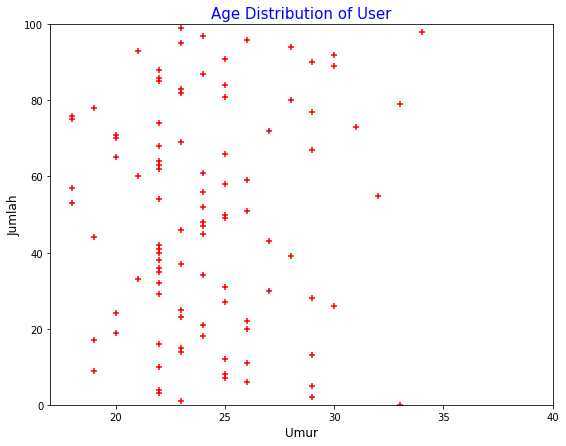

In [31]:
plt.figure(figsize=(9,7))
plt.scatter(df['age'], quantity,  marker='+', color='red')
plt.title("Age Distribution of User", fontsize = 15, color= "blue")
plt.xlabel('Umur', fontsize = 12)
plt.ylabel('Jumlah', fontsize = 12)
plt.xlim(xmin=17, xmax=40)
plt.ylim(ymin=0, ymax=100)
plt.show()

       Channel Name  Total
0           inbound     28
1  digital_festival     27
2          referral     23
3           organic     22


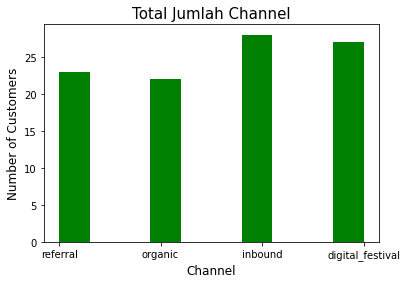

In [27]:
#2. berdasarkan channel

import collections
counter = collections.Counter(df.channel)
top_2_channel = counter.most_common()
cols = ['Channel Name', "Total"]
dframe = pd.DataFrame(top_2_channel, columns = cols)
print(dframe)


arr_top_2_channel = np.array(dframe)


plt.figure()
plt.title("Total Jumlah Channel", fontsize= 15)
plt.hist(df['channel'],color = "green", stacked  = True)
plt.xlabel('Channel', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.show()






In [28]:
#berdasarkan kota 

import collections
total_cust_per_city = collections.Counter(df.city)
temp_array_city = np.array(total_cust_per_city)
print(temp_array_city)

Counter({'surabaya': 29, 'bandung': 27, 'jakarta': 22, 'semarang': 22})


[('surabaya', 29), ('bandung', 27), ('jakarta', 22), ('semarang', 22)]


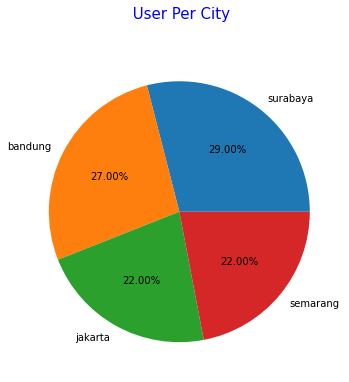

In [33]:
data = {'surabaya': 29, 'bandung': 27, 'jakarta': 22, 'semarang': 22}
nilai = [(key,value) for key,value in data.items()]
print(nilai)

labels, values = zip(*nilai)
plt.figure(figsize=(6,6))
plt.pie(values, labels= labels ,autopct='%1.2f%%')
plt.title(' User Per City', loc='center', pad=30, fontsize=15, color='blue')
plt.show()
